<a href="https://colab.research.google.com/github/promiseeselojor/British-Airways-Virtual-Internship-Program/blob/main/British_Airways_Data_Science_Virtual_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modeling Using BERTopic**

## **Step 1: Import Relevant Libraries**

In [ ]:
# Install bertopic
!pip install bertopic

In [ ]:
#web scraping
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

# Text preprocessiong
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

##**Step 2: Scrape and Load Data**

First we are going to scrape reviews from the [skytrax](https://www.airlinequality.com/) website and store them in a a list called reviews

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 2000

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Next is to create an empty dataframe and assign the reviews from the list to the review column

In [ ]:
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,✅ Trip Verified | Not only my first flight in...
1,✅ Trip Verified | My husband and myself were ...
2,✅ Trip Verified | Organised boarding process. ...
3,✅ Trip Verified | Outward journey BA245 Londo...
4,✅ Trip Verified | Check in agent at LHR was ve...


In [ ]:
#check the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3470 entries, 0 to 3469
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3470 non-null   object
dtypes: object(1)
memory usage: 27.2+ KB


## **Step 3: Data Cleaning and Text Preprocessing**

In [ ]:
#clean the dataset
data['reviews'] = data['reviews'].str.replace('Trip Verified \|', '')
data.head()

<ipython-input-22-9de4bfe2cd10>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviews'] = data['reviews'].str.replace('Trip Verified \|', '')


,reviews,reviews_without_stopwords,reviews_lemmatized
0,"✅ Not only my first flight in 17 years, but ...","✅TripVerified|firstflight17years,alsofirsttime...","✅TripVerified|firstflight17years,alsofirsttime..."
1,✅ My husband and myself were flying to Madri...,✅TripVerified|husbandflyingMadrid3rdFebruaryLe...,✅TripVerified|husbandflyingMadrid3rdFebruaryLe...
2,✅ Organised boarding process. Really friendly...,✅TripVerified|Organisedboardingprocess.Reallyf...,✅TripVerified|Organisedboardingprocess.Reallyf...
3,✅ Outward journey BA245 London to Buenos Air...,✅TripVerified|OutwardjourneyBA245LondonBuenosA...,✅TripVerified|OutwardjourneyBA245LondonBuenosA...
4,✅ Check in agent at LHR was very helpful and ...,✅TripVerified|CheckagentLHRhelpfulfriendlyflig...,✅TripVerified|CheckagentLHRhelpfulfriendlyflig...


In [ ]:
# view stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [ ]:
#Remove stopwords
data['reviews_without_stopwords'] = data['reviews'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

#lemmatization
data['reviews_lemmatized'] = data['reviews_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

data.head()

,reviews,reviews_without_stopwords,reviews_lemmatized
0,"✅ Not only my first flight in 17 years, but ...","✅ first flight 17 years, also first time back ...","✅ first flight 17 years, also first time back ..."
1,✅ My husband and myself were flying to Madri...,✅ husband flying Madrid 3rd February Legal mat...,✅ husband flying Madrid 3rd February Legal mat...
2,✅ Organised boarding process. Really friendly...,✅ Organised boarding process. Really friendly ...,✅ Organised boarding process. Really friendly ...
3,✅ Outward journey BA245 London to Buenos Air...,✅ Outward journey BA245 London Buenos Aires Cl...,✅ Outward journey BA245 London Buenos Aires Cl...
4,✅ Check in agent at LHR was very helpful and ...,✅ Check agent LHR helpful friendly flight crew...,✅ Check agent LHR helpful friendly flight crew...


## **Step 4: Build Model Using BERTopic**

In [ ]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(data['reviews_lemmatized'])

In [ ]:
#get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1693,-1_flight_seat_ba_crew
1,0,191,0_class_business_seat_ba
2,1,175,1_refund_cancelled_customer_flight
3,2,107,2_ba_heathrow_review_verified
4,3,86,3_excellent_lounge_club_europe
5,4,70,4_bag_baggage_luggage_day
6,5,65,5_meal_food_chicken_flight
7,6,55,6_town_cape_johannesburg_seat
8,7,55,7_bangkok_british_airways_meal
9,8,48,8_good_great_crew_flight


In [ ]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('class', 0.032982851237704544),
 ('business', 0.02779359300998984),
 ('seat', 0.01772748421727683),
 ('ba', 0.017599848328828504),
 ('first', 0.01411923541291248),
 ('economy', 0.010982017212826831),
 ('food', 0.010821353256609085),
 ('service', 0.01079328979217484),
 ('airline', 0.009730729748455267),
 ('airways', 0.009394501384270677)]

In [ ]:
#visualize top topic keywords
topic_model.visualize_barchart(top_n_topics = 12)

In [ ]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

## **Step 6: Topic Similiarities**

We want to analyze the relationships between the topics generated by the topic model. We will use 3 visualizations to examine the relationships
1. Intertopic Distance Map
2. The Heirarchical Clustering of Topics
3. Similiartiy Matrix

In [ ]:
#visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

From the graph, we can see that the bag relationship is closely connected with the cancelled customer. The great crew topic is also closely connected with excellent lounge club topic

In [ ]:
topic_model.visualize_heatmap()

## **Step 7: Model Predicted Probabilities Generated By The Topic Model**

In [ ]:
#visualize probability distribition of topics
topic_model.visualize_distribution(topic_model.probabilities_[0], min_probability=0.015)

From the probability distribution we can see that the topic with the highest probability of occuring is **Topic 2**

# **Sentiment Analysis**

## **Step 1: Import Libraries**

In [ ]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


## **Step 2: Load and Initialize Vader Sentiment Intensity Analyzer**

In [ ]:
#initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
#function to apply the sentiment analyzer to each text in the datafrmae
def sentiment_analyzer_scores(text):
    score = analyzer.polarity_scores(text)
    sentiment_score = score["compound"]
    if sentiment_score >= 0.05:
        sentiment = 1
    elif sentiment_score <= -0.05:
        sentiment = -1
    else:
        sentiment = 0
    return sentiment



In [ ]:
#create a new column that shows the sentiment for each text in the dataframe
data['sentiment'] = data['reviews_lemmatized'].apply(sentiment_analyzer_scores)

#show dataframe
data.head()


,reviews,reviews_without_stopwords,reviews_lemmatized,sentiment
0,"✅ Not only my first flight in 17 years, but ...","✅ first flight 17 years, also first time back ...","✅ first flight 17 years, also first time back ...",1
1,✅ My husband and myself were flying to Madri...,✅ husband flying Madrid 3rd February Legal mat...,✅ husband flying Madrid 3rd February Legal mat...,1
2,✅ Organised boarding process. Really friendly...,✅ Organised boarding process. Really friendly ...,✅ Organised boarding process. Really friendly ...,1
3,✅ Outward journey BA245 London to Buenos Air...,✅ Outward journey BA245 London Buenos Aires Cl...,✅ Outward journey BA245 London Buenos Aires Cl...,-1
4,✅ Check in agent at LHR was very helpful and ...,✅ Check agent LHR helpful friendly flight crew...,✅ Check agent LHR helpful friendly flight crew...,1


## **Step 3: Data Analysis**

In [ ]:
data['sentiment'].value_counts()

 1    2365
-1    1050
 0      55
Name: sentiment, dtype: int64

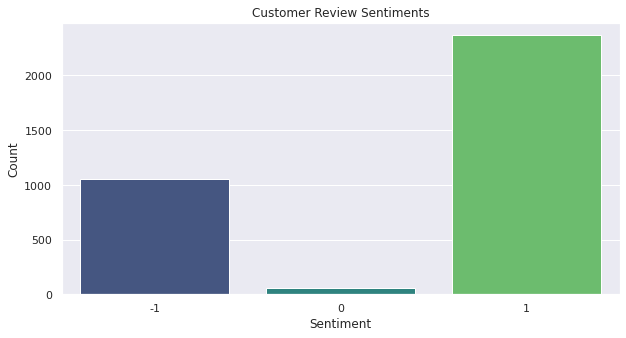

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
sns.countplot(x="sentiment", data=data, palette='viridis')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Customer Review Sentiments")
plt.show()


Overall British airways has a positive sentiment, meaning majority of customers are satisified with the airine services british airways offers

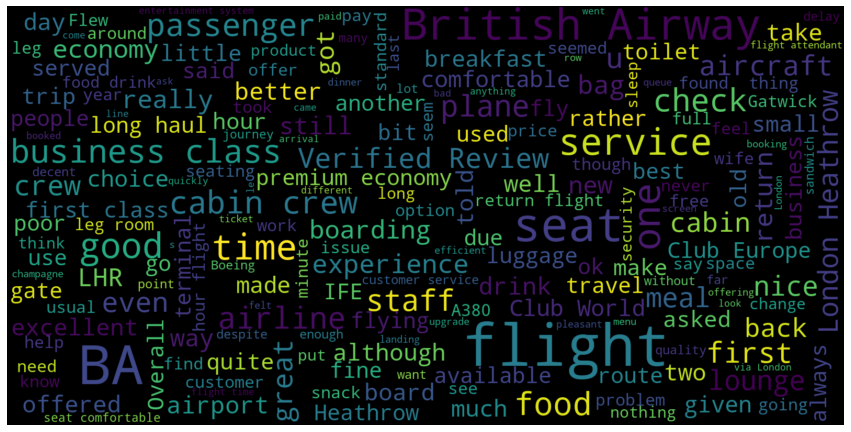

In [ ]:
#create wordcloud for words with positive sentiment
consolidated=' '.join(word for word in data['reviews_lemmatized'][data['sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

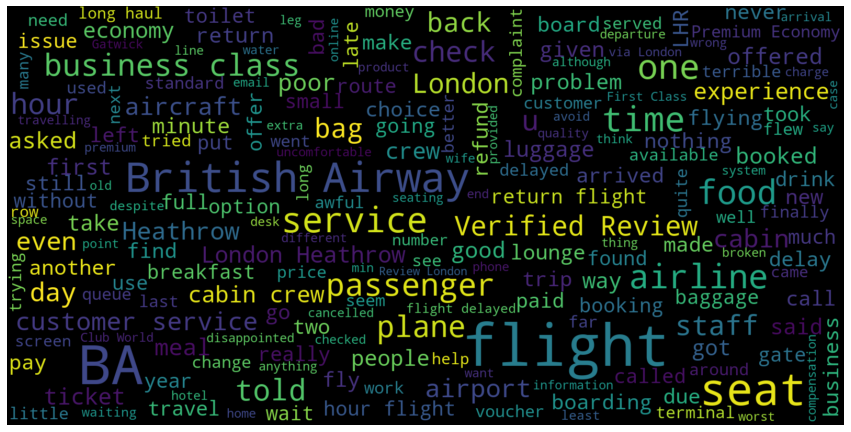

In [ ]:
#create wordcloud for words with negative sentiment
consolidated=' '.join(word for word in data['reviews_lemmatized'][data['sentiment']==-1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

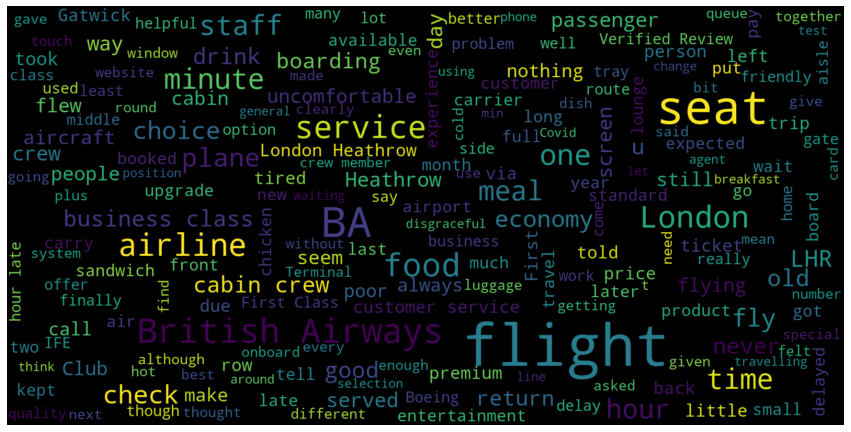

In [ ]:
#create wordcloud for words with neutral sentiment
consolidated=' '.join(word for word in data['reviews_lemmatized'][data['sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()